# Generating Music Lyrics from Deep Learning using LSTM Networks.

## Let us talk about Neural Networks First, Fast! 

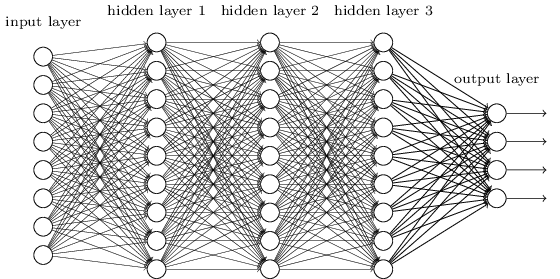

## Lets check out another one!

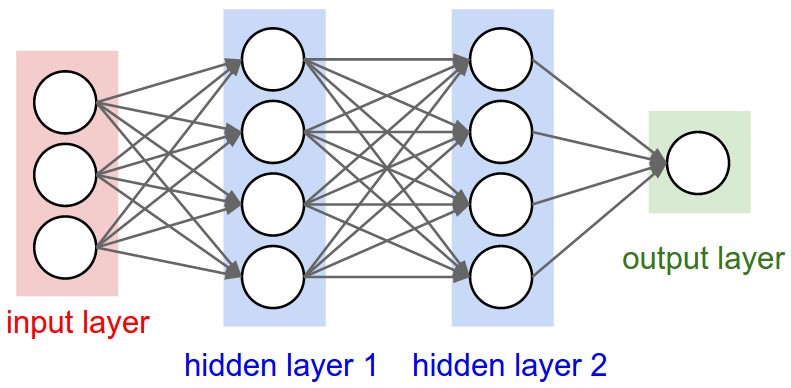

### Don't Freak Out looking at these images! It was added delibrately to scare you!

## Forward Propagation of a NN.

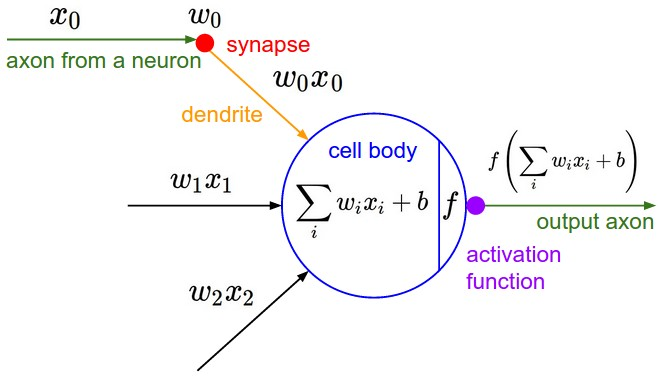

## Backward Propagation of a NN.

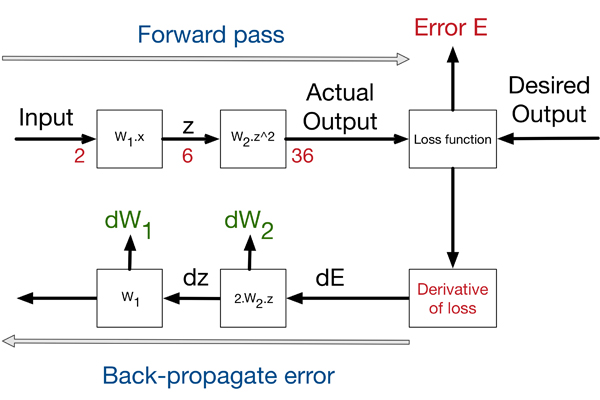

## Ok, Rakshith. How does it all fit together?

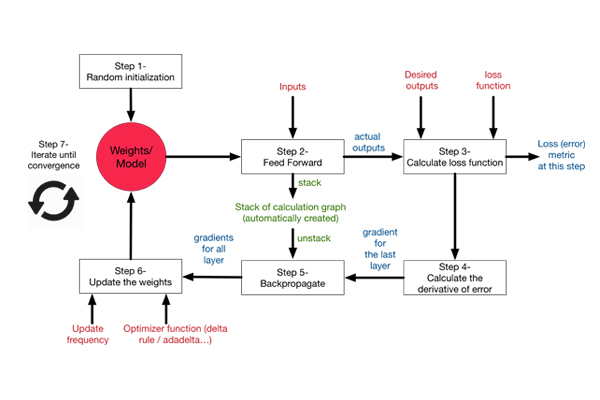

### Cool, What's next?

## Superfast Intro To Recurrent Neural Networks (RNN)

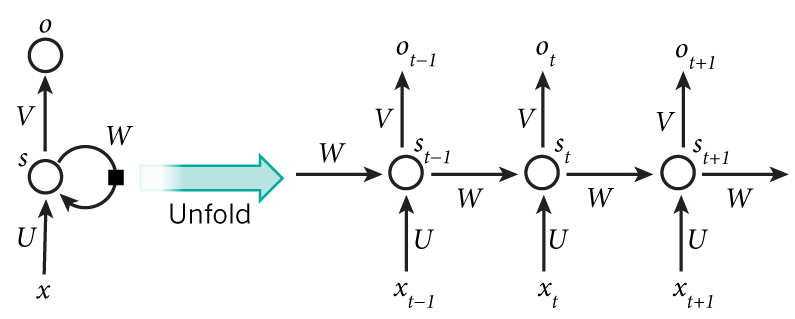

## Sequences and Memory! That's what it's all about! 

## This is what it means to say the current output is also a derived from the hidden state of the previous output. 

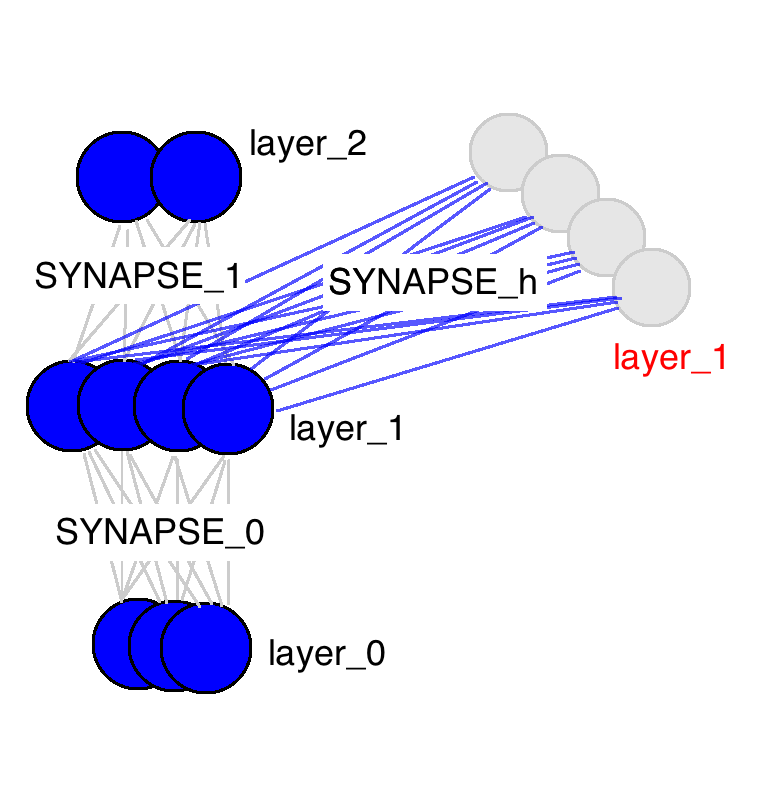

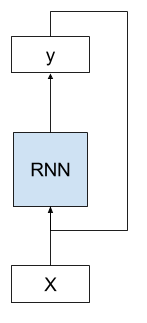
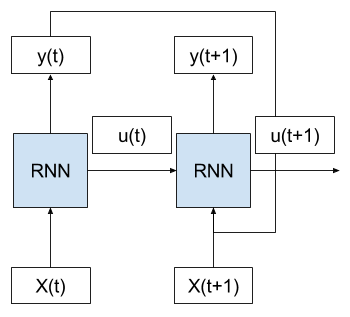

# RNN Mathematical Intuition 

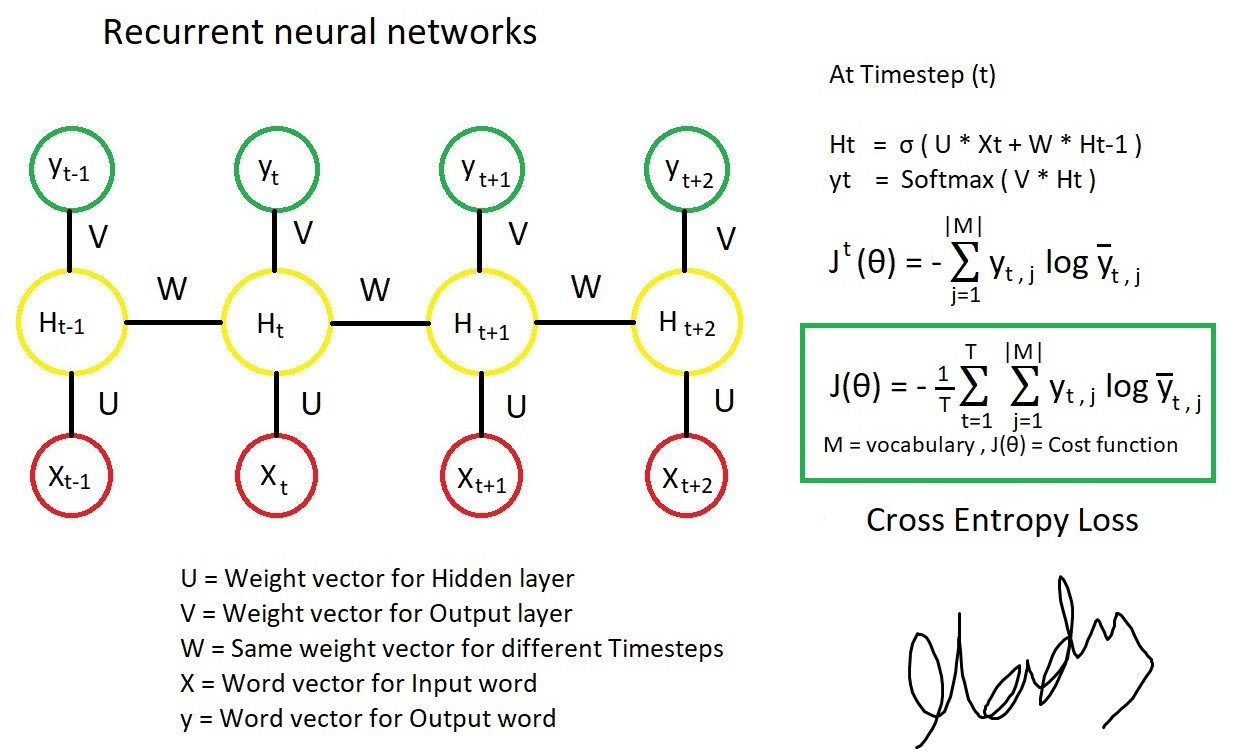

# Long sequence: “I played basketball in I ate tacos and burgers.... I like playing basketball.”

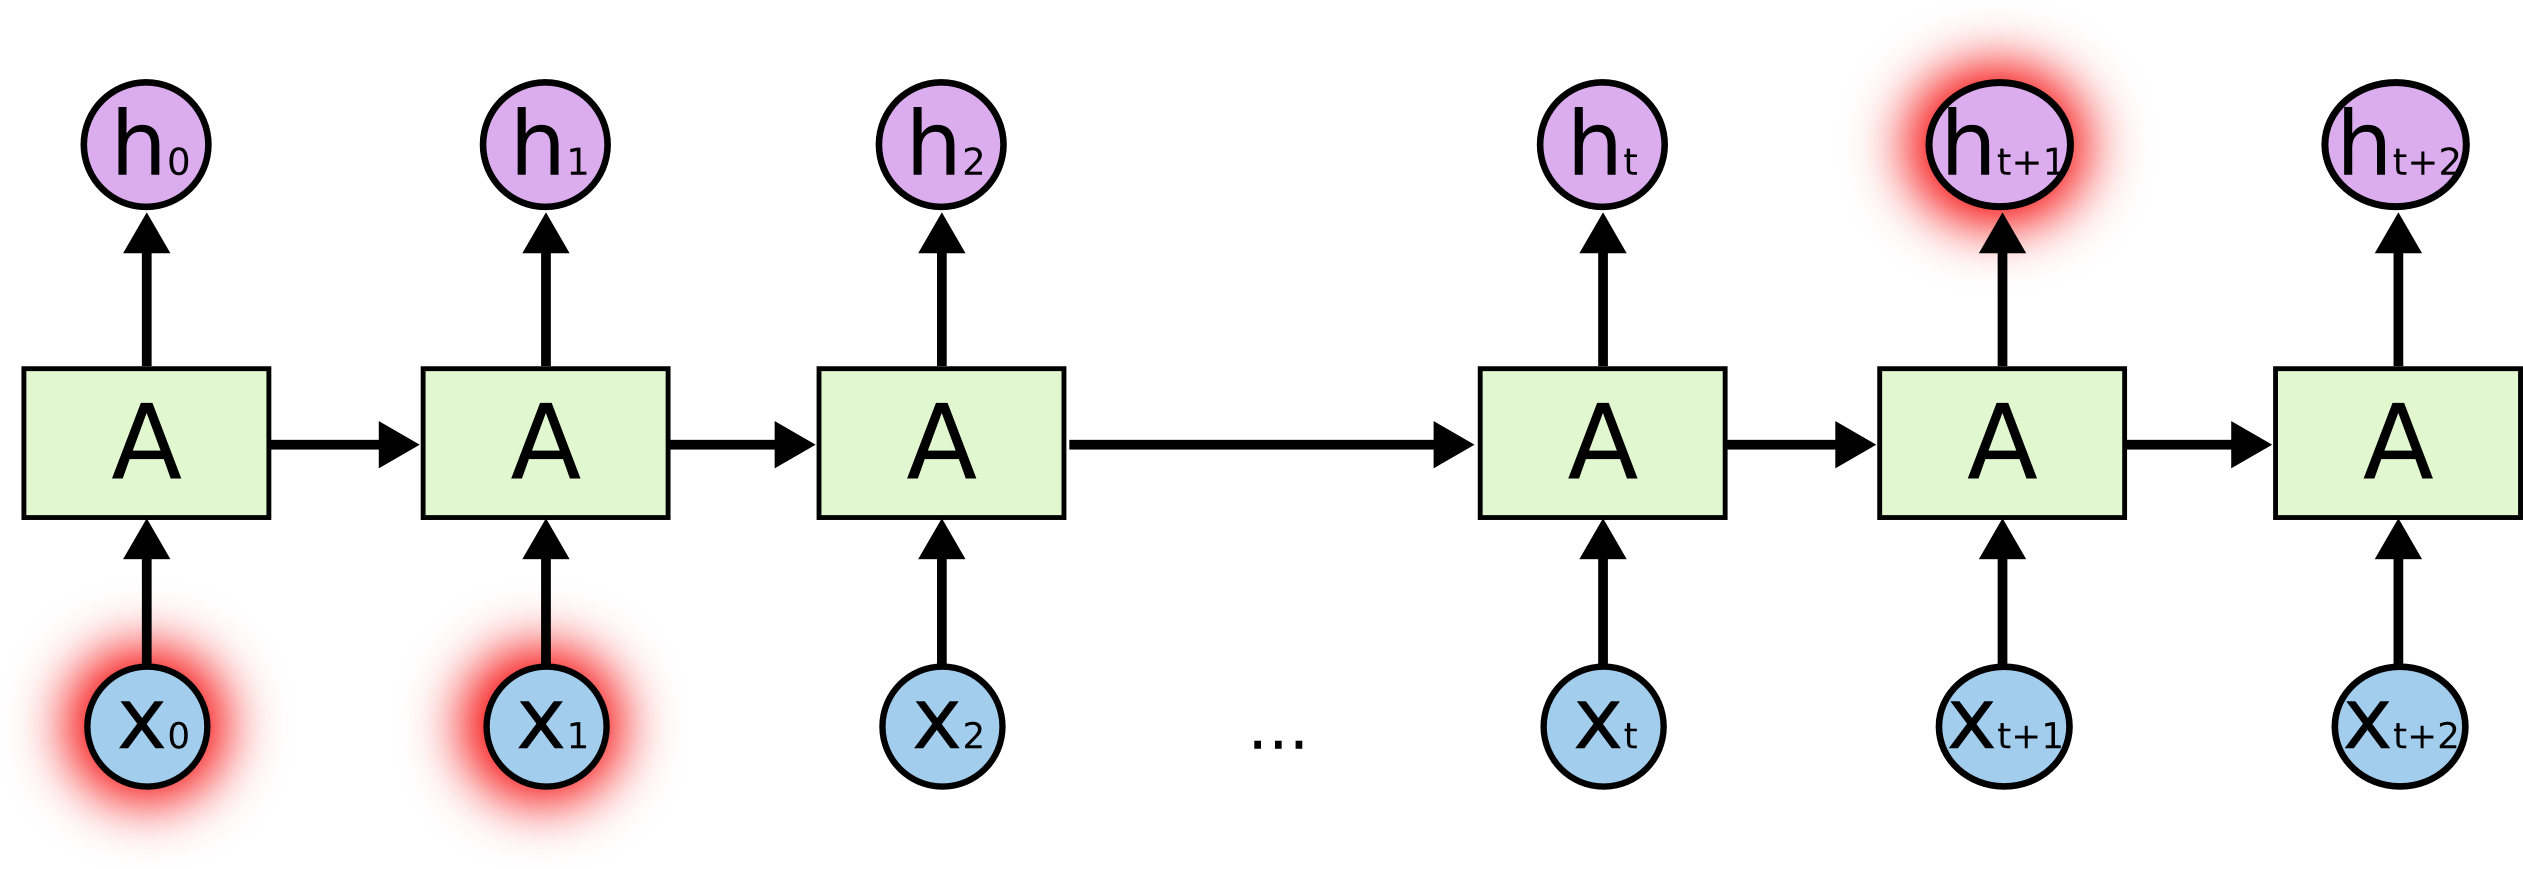

# Gradient problem and long term sequences in RNN'S are a mess! Enter LSTM! ;)

# LSTM = LONG SHORT TERM MEMORY NETWORK

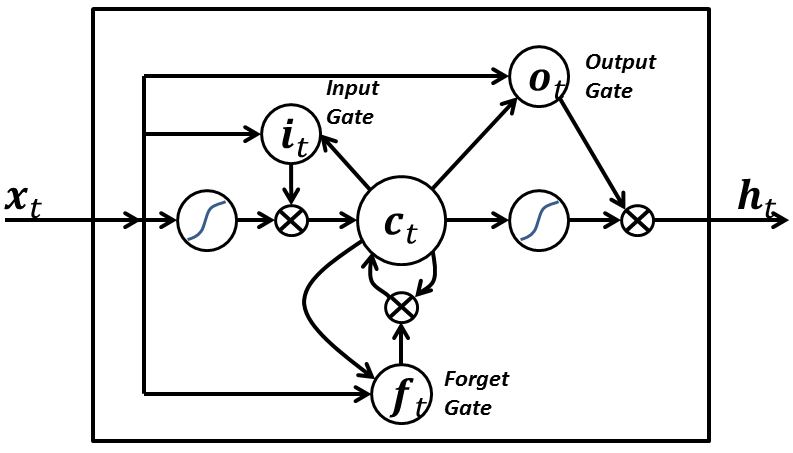

# 3 Gates: Input, Forget, Output

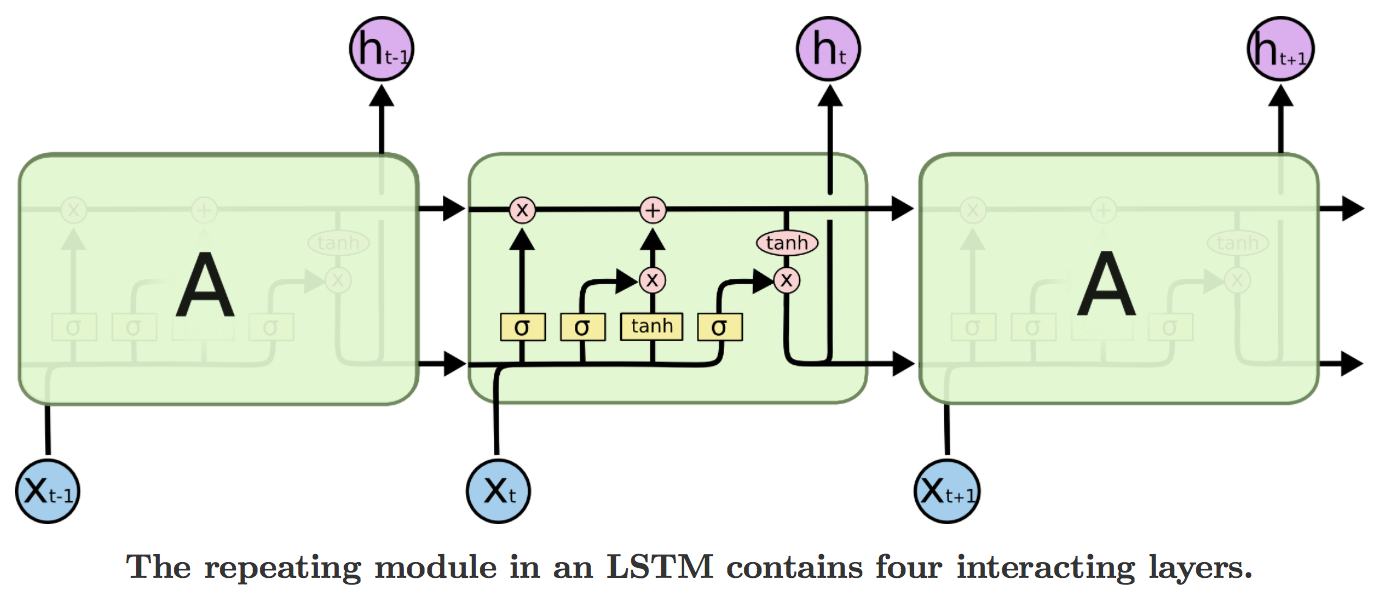


# LSTM Mathematical Intuition 


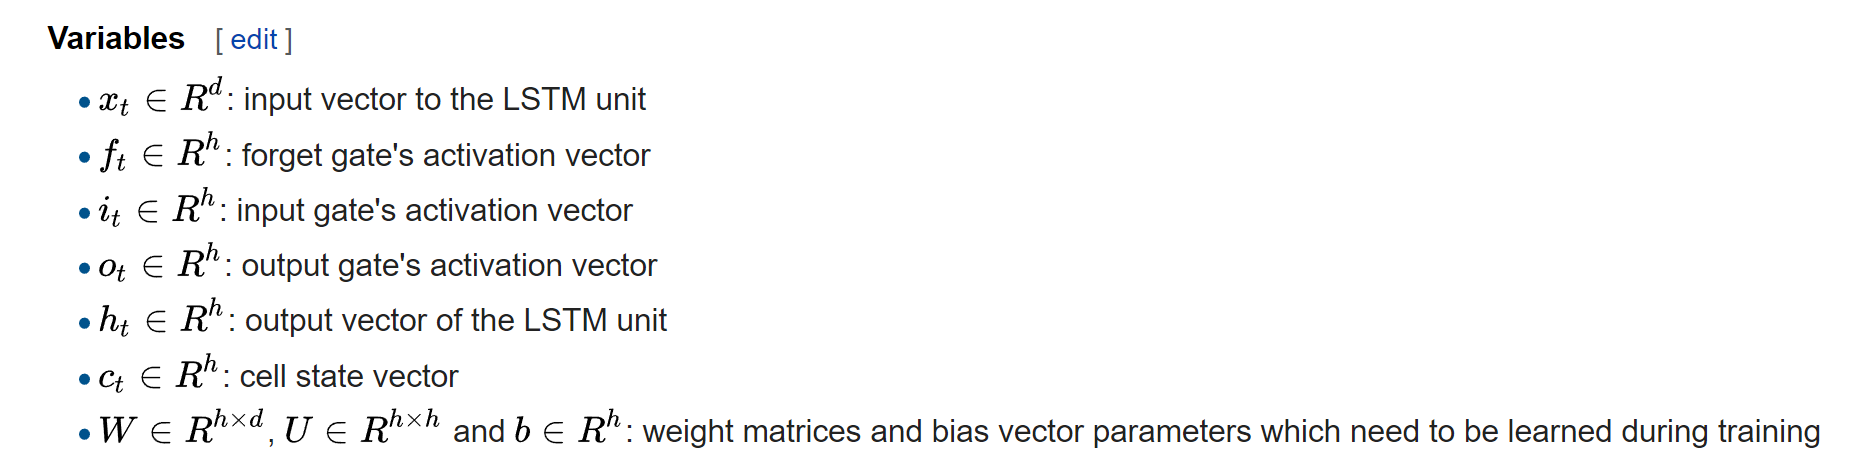

# Cool! Let's Generate Music Lyrics, Shall We?

In [1]:
# import the required libraries.

import h5py
import numpy
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

C:\Users\Rakshith\Miniconda3\envs\machinelearning\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# check for GPU 
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17238883944167632683
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6722212987
locality {
  bus_id: 1
}
incarnation: 885769477987514303
physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [4]:
# load ascii text and covert to lowercase
filename = "dataset/lovelyrics.txt"
raw_text = open(filename,encoding='utf-8').read()
raw_text = raw_text.lower()
raw_text

"when i see you\ni run out of words to say (oh, oh)\ni wouldn't leave you\n'cause you're that type of girl to make me stay (oh, oh)\ni see the guys tryna' holla\ngirl i don't wanna bother you\n'cause you're independent and you got my attention\ncan i be your baby father?\ngirl i just wanna show you\nthat i love what you are doin' hun\ni see you in the club\nyou gettin' down good\ni wanna get with you, yeah\ni see you in the club\nyou showin' thugs love\ni wanna get with you\nyou're so beautiful\nso damn beautiful\nsaid you're so beautiful\nso damn beautiful\nyou're so beautiful\nbeautiful\nbeautiful\nbeautiful\nyou're so beautiful\nbeautiful\nbeautiful\nbeautiful\nyou're so beautiful\nlike the clouds you\ndrift me away, far away (yeah)\nand like the sun you\nbrighten my day, you brighten my day (yeah)\ni never wanna see you cry, cry, cry\nand i never wanna tell a lie, lie, lie\nsaid i never wanna see you cry, cry, cry\nand i never wanna tell a lie, lie, lie\ni see you in the club\nyou 

In [5]:
# get all the chars in the sequence of text

chars = sorted(list(set(raw_text)))

In [6]:
# convert to dicts 

char_to_int = {ch:i for i,ch in enumerate(chars)}
int_to_char = {i:ch for i,ch in enumerate(chars)}

In [7]:
# setup the variables used later 

n_chars = len(raw_text)
n_vocab = len(chars)
print ("Total Characters: {} ".format(n_chars))
print ("Total Vocab: {}".format(n_vocab))

Total Characters: 14899 
Total Vocab: 38


In [8]:
# prepare the dataset of input to output pairs encoded as integers

seq_length = 100
dataX = []
dataY = []

for i in range(0, n_chars - seq_length, 1):
    seq_in = raw_text[i:i + seq_length]
    seq_out = raw_text[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])

n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)

Total Patterns:  14799


In [9]:
# just checkout y
dataY

[29,
 23,
 1,
 31,
 26,
 1,
 24,
 12,
 22,
 16,
 1,
 24,
 16,
 1,
 30,
 31,
 12,
 36,
 1,
 3,
 26,
 19,
 5,
 1,
 26,
 19,
 4,
 0,
 20,
 1,
 30,
 16,
 16,
 1,
 31,
 19,
 16,
 1,
 18,
 32,
 36,
 30,
 1,
 31,
 29,
 36,
 25,
 12,
 2,
 1,
 19,
 26,
 23,
 23,
 12,
 0,
 18,
 20,
 29,
 23,
 1,
 20,
 1,
 15,
 26,
 25,
 2,
 31,
 1,
 34,
 12,
 25,
 25,
 12,
 1,
 13,
 26,
 31,
 19,
 16,
 29,
 1,
 36,
 26,
 32,
 0,
 2,
 14,
 12,
 32,
 30,
 16,
 1,
 36,
 26,
 32,
 2,
 29,
 16,
 1,
 20,
 25,
 15,
 16,
 27,
 16,
 25,
 15,
 16,
 25,
 31,
 1,
 12,
 25,
 15,
 1,
 36,
 26,
 32,
 1,
 18,
 26,
 31,
 1,
 24,
 36,
 1,
 12,
 31,
 31,
 16,
 25,
 31,
 20,
 26,
 25,
 0,
 14,
 12,
 25,
 1,
 20,
 1,
 13,
 16,
 1,
 36,
 26,
 32,
 29,
 1,
 13,
 12,
 13,
 36,
 1,
 17,
 12,
 31,
 19,
 16,
 29,
 9,
 0,
 18,
 20,
 29,
 23,
 1,
 20,
 1,
 21,
 32,
 30,
 31,
 1,
 34,
 12,
 25,
 25,
 12,
 1,
 30,
 19,
 26,
 34,
 1,
 36,
 26,
 32,
 0,
 31,
 19,
 12,
 31,
 1,
 20,
 1,
 23,
 26,
 33,
 16,
 1,
 34,
 19,
 12,
 31,
 1,
 36,
 26,
 

In [10]:
# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)

In [11]:
# define the LSTM model

model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [11]:
# define the checkpoint

filepath="demo-love-songs-weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [23]:
# load the model from previous epoch - 300th epoch
# load the network weights
filename = "demo-love-songs-weights-improvement-416-0.0169.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [13]:
import time 
# your code here

t1 = time.time()

with tf.device('/gpu:0'):
    model.fit(X, y, epochs=700, batch_size=128,callbacks=callbacks_list)

t2 = time.time()
print("Training took:")
t2-t1

Epoch 1/700
14799/14799 [==============================] - 42s - loss: 3.0711    
Epoch 2/700
14799/14799 [==============================] - 40s - loss: 3.0199    
Epoch 3/700
14799/14799 [==============================] - 40s - loss: 3.0139    
Epoch 4/700
14799/14799 [==============================] - 40s - loss: 3.0059    
Epoch 5/700
14799/14799 [==============================] - 40s - loss: 2.8873    
Epoch 6/700
14799/14799 [==============================] - 40s - loss: 2.7511    
Epoch 7/700
14799/14799 [==============================] - 40s - loss: 2.6577    
Epoch 8/700
14799/14799 [==============================] - 40s - loss: 2.5537    
Epoch 9/700
14799/14799 [==============================] - 40s - loss: 2.4242    
Epoch 10/700
14799/14799 [==============================] - 40s - loss: 2.2826    
Epoch 11/700
14799/14799 [==============================] - 40s - loss: 2.1132    
Epoch 12/700
14799/14799 [==============================] - 40s - loss: 1.9362    
Epoch 13/700


14799/14799 [==============================] - 40s - loss: 0.0607    
Epoch 66/700
14799/14799 [==============================] - 40s - loss: 0.0509    
Epoch 67/700
14799/14799 [==============================] - 40s - loss: 0.0513    
Epoch 68/700
14799/14799 [==============================] - 40s - loss: 0.0521    
Epoch 69/700
14799/14799 [==============================] - 40s - loss: 0.0563    
Epoch 70/700
14799/14799 [==============================] - 40s - loss: 0.0512    
Epoch 71/700
14799/14799 [==============================] - 40s - loss: 0.0555    
Epoch 72/700
14799/14799 [==============================] - 40s - loss: 0.0513    
Epoch 73/700
14799/14799 [==============================] - 40s - loss: 0.0592    
Epoch 74/700
14799/14799 [==============================] - 40s - loss: 0.0520    
Epoch 75/700
14799/14799 [==============================] - 40s - loss: 0.0449    
Epoch 76/700
14799/14799 [==============================] - 40s - loss: 0.0448    
Epoch 77/700
1479

14799/14799 [==============================] - 40s - loss: 0.0404    
Epoch 147/700
14799/14799 [==============================] - 40s - loss: 0.0319    
Epoch 148/700
14799/14799 [==============================] - 40s - loss: 0.0321    
Epoch 149/700
14799/14799 [==============================] - 40s - loss: 0.0305    
Epoch 150/700
14799/14799 [==============================] - 40s - loss: 0.0309    
Epoch 151/700
14799/14799 [==============================] - 40s - loss: 0.0309    
Epoch 152/700
14799/14799 [==============================] - 40s - loss: 0.0251    
Epoch 153/700
14799/14799 [==============================] - 40s - loss: 0.0285    
Epoch 154/700
14799/14799 [==============================] - 40s - loss: 0.0279    
Epoch 155/700
14799/14799 [==============================] - 40s - loss: 0.0259    
Epoch 156/700
14799/14799 [==============================] - 40s - loss: 0.0283    
Epoch 157/700
14799/14799 [==============================] - 40s - loss: 0.0352    
Epoch 

14799/14799 [==============================] - 40s - loss: 0.0239    
Epoch 190/700
14799/14799 [==============================] - 40s - loss: 0.0256    
Epoch 191/700
14799/14799 [==============================] - 40s - loss: 0.0250    
Epoch 192/700
14799/14799 [==============================] - 40s - loss: 0.0273    
Epoch 193/700
14799/14799 [==============================] - 40s - loss: 0.0354    
Epoch 194/700
14799/14799 [==============================] - 40s - loss: 0.0298    
Epoch 195/700
14799/14799 [==============================] - 40s - loss: 0.0306    
Epoch 196/700
14799/14799 [==============================] - 40s - loss: 0.0281    
Epoch 197/700
14799/14799 [==============================] - 40s - loss: 0.0255    
Epoch 198/700
14799/14799 [==============================] - 40s - loss: 0.0244    
Epoch 199/700
14799/14799 [==============================] - 40s - loss: 0.0247    
Epoch 200/700
14799/14799 [==============================] - 40s - loss: 0.0286    
Epoch 

14799/14799 [==============================] - 40s - loss: 0.0284    
Epoch 277/700
14799/14799 [==============================] - 40s - loss: 0.0230    
Epoch 278/700
14799/14799 [==============================] - 40s - loss: 0.0214    
Epoch 279/700
14799/14799 [==============================] - 40s - loss: 0.0271    
Epoch 280/700
14799/14799 [==============================] - 40s - loss: 0.0254    
Epoch 281/700
14799/14799 [==============================] - 40s - loss: 0.0243    
Epoch 282/700
14799/14799 [==============================] - 40s - loss: 0.0252    
Epoch 283/700
14799/14799 [==============================] - 40s - loss: 0.0256    
Epoch 284/700
14799/14799 [==============================] - 40s - loss: 0.0279    
Epoch 285/700
14799/14799 [==============================] - 40s - loss: 0.0270    
Epoch 286/700
14799/14799 [==============================] - 40s - loss: 0.0227    
Epoch 287/700
14799/14799 [==============================] - 40s - loss: 0.0271    
Epoch 

14799/14799 [==============================] - 40s - loss: 0.0295    
Epoch 319/700
14799/14799 [==============================] - 40s - loss: 0.0272    
Epoch 320/700
14799/14799 [==============================] - 40s - loss: 0.0295    
Epoch 321/700
14799/14799 [==============================] - 40s - loss: 0.0277    
Epoch 322/700
14799/14799 [==============================] - 40s - loss: 0.0274    
Epoch 323/700
14799/14799 [==============================] - 40s - loss: 0.0291    
Epoch 324/700
14799/14799 [==============================] - 40s - loss: 0.0314    
Epoch 325/700
14799/14799 [==============================] - 40s - loss: 0.0262    
Epoch 326/700
14799/14799 [==============================] - 40s - loss: 0.0284    
Epoch 327/700
14799/14799 [==============================] - 40s - loss: 0.0259    
Epoch 328/700
14799/14799 [==============================] - 40s - loss: 0.0257    
Epoch 329/700
14799/14799 [==============================] - 40s - loss: 0.0252    
Epoch 

14799/14799 [==============================] - 40s - loss: 0.0452    
Epoch 406/700
14799/14799 [==============================] - 40s - loss: 0.0395    
Epoch 407/700
14799/14799 [==============================] - 40s - loss: 0.0317    
Epoch 408/700
14799/14799 [==============================] - 40s - loss: 0.0244    
Epoch 409/700
14799/14799 [==============================] - 40s - loss: 0.0231    
Epoch 410/700
14799/14799 [==============================] - 40s - loss: 0.0206    
Epoch 411/700
14799/14799 [==============================] - 40s - loss: 0.0212    
Epoch 412/700
14799/14799 [==============================] - 40s - loss: 0.0188    
Epoch 413/700
14799/14799 [==============================] - 40s - loss: 0.0200    
Epoch 414/700
14799/14799 [==============================] - 40s - loss: 0.0214    
Epoch 415/700
14799/14799 [==============================] - 40s - loss: 0.0174    
Epoch 416/700
14799/14799 [==============================] - 40s - loss: 0.0183    
Epoch 

14799/14799 [==============================] - 40s - loss: 0.0339    
Epoch 448/700
14799/14799 [==============================] - 40s - loss: 0.0430    
Epoch 449/700
14799/14799 [==============================] - 40s - loss: 0.0360    
Epoch 450/700
14799/14799 [==============================] - 40s - loss: 0.0464    
Epoch 451/700
14799/14799 [==============================] - 40s - loss: 0.0384    
Epoch 452/700
14799/14799 [==============================] - 40s - loss: 0.0419    
Epoch 453/700
14799/14799 [==============================] - 40s - loss: 0.0306    
Epoch 454/700
14799/14799 [==============================] - 40s - loss: 0.0300    
Epoch 455/700
14799/14799 [==============================] - 40s - loss: 0.0268    
Epoch 456/700
14799/14799 [==============================] - 40s - loss: 0.0238    
Epoch 457/700
14799/14799 [==============================] - 40s - loss: 0.0271    
Epoch 458/700
14799/14799 [==============================] - 40s - loss: 0.0233    
Epoch 

14799/14799 [==============================] - 40s - loss: 0.0653    
Epoch 535/700
14799/14799 [==============================] - 40s - loss: 0.0431    
Epoch 536/700
14799/14799 [==============================] - 40s - loss: 0.0354    
Epoch 537/700
14799/14799 [==============================] - 40s - loss: 0.0333    
Epoch 538/700
14799/14799 [==============================] - 40s - loss: 0.0306    
Epoch 539/700
14799/14799 [==============================] - 40s - loss: 0.0286    
Epoch 540/700
14799/14799 [==============================] - 40s - loss: 0.0280    
Epoch 541/700
14799/14799 [==============================] - 40s - loss: 0.0273    
Epoch 542/700
14799/14799 [==============================] - 40s - loss: 0.0261    
Epoch 543/700
14799/14799 [==============================] - 40s - loss: 0.0315    
Epoch 544/700
14799/14799 [==============================] - 40s - loss: 0.0317    
Epoch 545/700
14799/14799 [==============================] - 40s - loss: 0.0383    
Epoch 

14799/14799 [==============================] - 40s - loss: 0.0263    
Epoch 622/700
14799/14799 [==============================] - 40s - loss: 0.0256    
Epoch 623/700
14799/14799 [==============================] - 40s - loss: 0.0277    
Epoch 624/700
14799/14799 [==============================] - 40s - loss: 0.0280    
Epoch 625/700
14799/14799 [==============================] - 40s - loss: 0.0285    
Epoch 626/700
14799/14799 [==============================] - 40s - loss: 0.0340    
Epoch 627/700
14799/14799 [==============================] - 40s - loss: 0.0329    
Epoch 628/700
14799/14799 [==============================] - 40s - loss: 0.0321    
Epoch 629/700
14799/14799 [==============================] - 40s - loss: 0.0350    
Epoch 630/700
14799/14799 [==============================] - 40s - loss: 0.0442    
Epoch 631/700
14799/14799 [==============================] - 40s - loss: 0.0413    
Epoch 632/700
14799/14799 [==============================] - 40s - loss: 0.0514    
Epoch 

28280.204392910004

In [27]:
import sys

# load text from the model

# pick a random seed
start = numpy.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Love song Lyrics Starting now:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")

# generate characters
for i in range(1000):
    x = numpy.reshape(pattern, (1, len(pattern), 1))
    x = x / float(n_vocab)
    prediction = model.predict(x, verbose=0)
    index = numpy.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    sys.stdout.write(result)
    pattern.append(index) 
    pattern = pattern[1:len(pattern)]
    
print("\n")    
print ("\n-------End: It's your time to sing-------")

Love song Lyrics Starting now:
" little time,
time is slipping away,
away from us so stay,
stay with me i can make,
make you glad you "
 came
the sun goes down
tometimes i'm in disbelief i didn't know
somehow i need to be alone
don't stay
forget our memories
forget our possibilities
what you were changing me into
(just give me myself back and)
don't stay
forget our memories
forget our possibilities
take all your faithlessness with you
just give me myself back and
don't stay
i don't need you anymore, i don't want to be ignored
i don't need one more day of you wasting me away
with no apologies
don't stay
forget our memories
forget our possibilities
what you were changing me into
(just give me myself back and)
don't stay
forget our memories
forget our possibilities
take all your faithlessness with you
just give me myself back and
don't stay
i don't need you anymore, i don't want to be ignored
i don't need one more day of you wasting me away
with no apologies
don't stay
forget our memories

# Subscribe To My YouTube Channel for More Tutorials.

https://www.youtube.com/c/rakshithvasudev

# Acknowledgements

https://en.wikipedia.org/wiki/Long_short-term_memory

http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns

https://iamtrask.github.io/2015/11/15/anyone-can-code-lstm

http://colah.github.io/posts/2015-08-Understanding-LSTMs

https://datathings.com/blog/post/neuralnet    

https://machinelearningmastery.com/category/lstm/